In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import seaborn as sns
from scipy import stats as st
from statistics import mean
#увеличим дефолтный размер графиков
#from pylab import rcParams
#rcParams['figure.figsize'] = 20, 10
import warnings
warnings.simplefilter('ignore')
df_jan_2020 = pd.read_csv('Ku_от трефилова_янв 2020.txt', sep='|')

#### май 2019 - январь 2020:

In [2]:
df_may_2019 = pd.read_csv('Ku_от трефилова_май 2019.txt', sep='|')
df_may_2019['date'] = '01.05.2019'
df_jun_2019 = pd.read_csv('Ku_от трефилова_июн 2019.txt', sep='|')
df_jun_2019['date'] = '01.06.2019'
df_jul_2019 = pd.read_csv('Ku_от трефилова_июл 2019.txt', sep='|')
df_jul_2019['date'] = '01.07.2019'
df_aug_2019 = pd.read_csv('Ku_от трефилова_авг 2019.txt', sep='|')
df_aug_2019['date'] = '01.08.2019'
df_sep_2019 = pd.read_csv('Ku_от трефилова_сен 2019.txt', sep='|')
df_sep_2019['date'] = '01.09.2019'
df_oct_2019 = pd.read_csv('Ku_от трефилова_окт 2019.txt', sep='|')
df_oct_2019['date'] = '01.10.2019'
df_nov_2019 = pd.read_csv('Ku_от трефилова_ноя 2019.txt', sep='|')
df_nov_2019['date'] = '01.11.2019'
df_dec_2019 = pd.read_csv('Ku_от трефилова_дек 2019.txt', sep='|')
df_dec_2019['date'] = '01.12.2019'
df_jan_2020 = pd.read_csv('Ku_от трефилова_янв 2020.txt', sep='|')
df_jan_2020['date'] = '01.01.2020'

In [3]:
# объединение таблиц, правки:
df = pd.concat([df_may_2019, df_jun_2019 ,df_jul_2019, df_aug_2019, df_sep_2019, df_oct_2019,df_nov_2019, df_dec_2019, df_jan_2020])
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df.columns=['port', 'min', 'max', 'avg', 'avg_chnn', 'date']
df = df.replace('-', 0)
df['avg_chnn'] = df['avg_chnn'].astype(float)

In [4]:
#приведение к mbps:
df['min'] = df['min'] / 1000000
df['max'] = df['max'] / 1000000
df['avg'] = df['avg'] / 1000000
df['avg_chnn'] = df['avg_chnn'] / 1000000

### Динамика средней загрузки в 2ч ЧНН - Hughes HN + HX - Ямал 401:

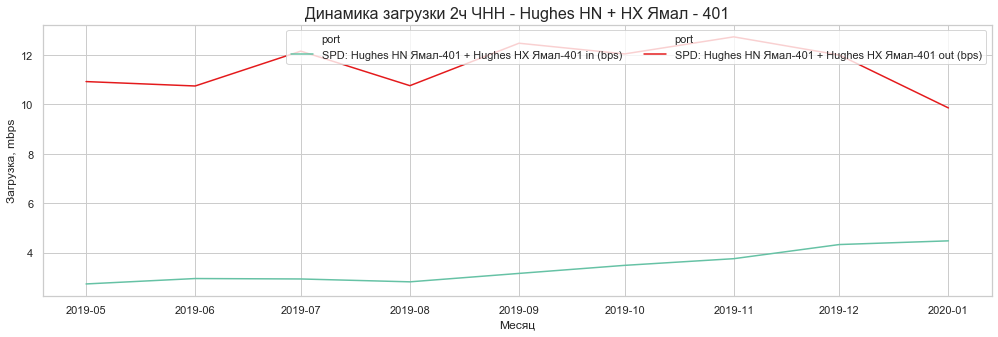

In [5]:
sns.set(style="whitegrid", color_codes=True, palette="Set1")
f, ax = plt.subplots(figsize = (17,5))
sns.lineplot(data=df.query('port == "SPD: Hughes HN Ямал-401 + Hughes HX Ямал-401 in (bps)"'), x='date', y='avg_chnn', hue="port", palette="Set2")
sns.lineplot(data=df.query('port == "SPD: Hughes HN Ямал-401 + Hughes HX Ямал-401 out (bps)"'), x='date', y='avg_chnn', hue="port")      
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="Загрузка, mbps",
       xlabel="Месяц")
#plt.xlim(2010, 2016)
plt.title('Динамика загрузки 2ч ЧНН - Hughes HN + HX Ямал - 401', fontsize=16)
plt.show()

### Динамика средней загрузки в 2ч ЧНН - Hughes HN Ямал 402 М.Озера:

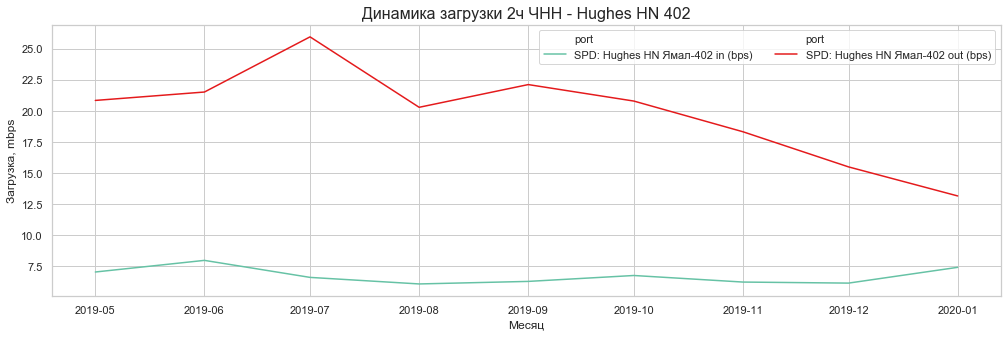

In [6]:
sns.set(style="whitegrid", color_codes=True, palette="Set1")
f, ax = plt.subplots(figsize = (17,5))
sns.lineplot(data=df.query('port == "SPD: Hughes HN Ямал-402 in (bps)"'), x='date', y='avg_chnn', hue="port", palette="Set2")
sns.lineplot(data=df.query('port == "SPD: Hughes HN Ямал-402 out (bps)"'), x='date', y='avg_chnn', hue="port")      
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="Загрузка, mbps",
       xlabel="Месяц")
#plt.xlim(2010, 2016)
plt.title('Динамика загрузки 2ч ЧНН - Hughes HN 402', fontsize=16)
plt.show()

### Динамика средней загрузки в 2ч ЧНН - Gilat SE II Ямал 402 М.Озера:

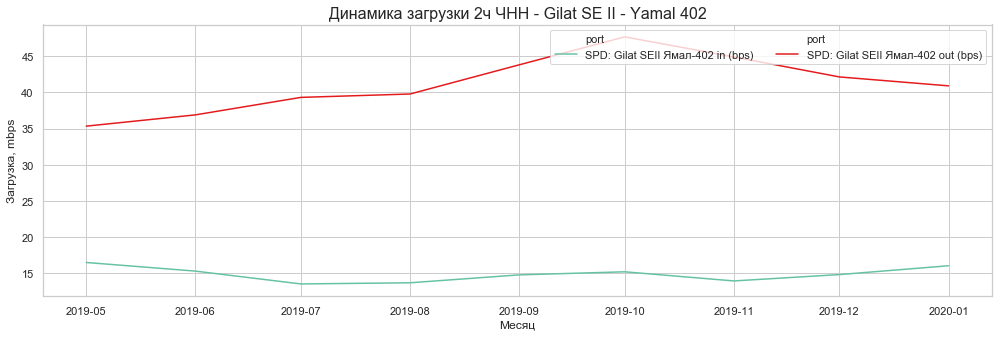

In [7]:
sns.set(style="whitegrid", color_codes=True, palette="Set1")
f, ax = plt.subplots(figsize = (17,5))
sns.lineplot(data=df.query('port == "SPD: Gilat SEII Ямал-402 in (bps)"'), x='date', y='avg_chnn', hue="port", palette="Set2")
sns.lineplot(data=df.query('port == "SPD: Gilat SEII Ямал-402 out (bps)"'), x='date', y='avg_chnn', hue="port")      
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="Загрузка, mbps",
       xlabel="Месяц")
#plt.xlim(2010, 2016)
plt.title('Динамика загрузки 2ч ЧНН - Gilat SE II - Yamal 402', fontsize=16)
plt.show()

### Динамика средней загрузки в 2ч ЧНН - Gilat SE I - AM6 Павловский Посад:

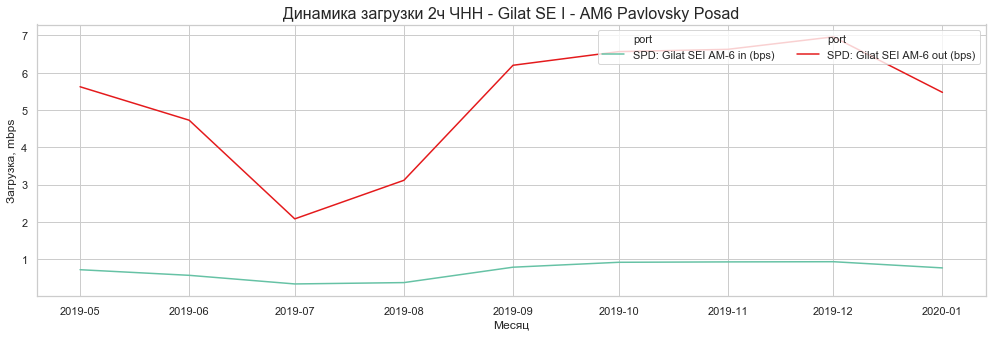

In [8]:
sns.set(style="whitegrid", color_codes=True, palette="Set1")
f, ax = plt.subplots(figsize = (17,5))
sns.lineplot(data=df.query('port == "SPD: Gilat SEI AM-6 in (bps)"'), x='date', y='avg_chnn', hue="port", palette="Set2")
sns.lineplot(data=df.query('port == "SPD: Gilat SEI AM-6 out (bps)"'), x='date', y='avg_chnn', hue="port")      
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="Загрузка, mbps",
       xlabel="Месяц")
#plt.xlim(2010, 2016)
plt.title('Динамика загрузки 2ч ЧНН - Gilat SE I - АМ6 Pavlovsky Posad', fontsize=16)
plt.show()

### Динамика средней загрузки в 2ч ЧНН - Gilat SE I - AM5 Князе-Волконское:

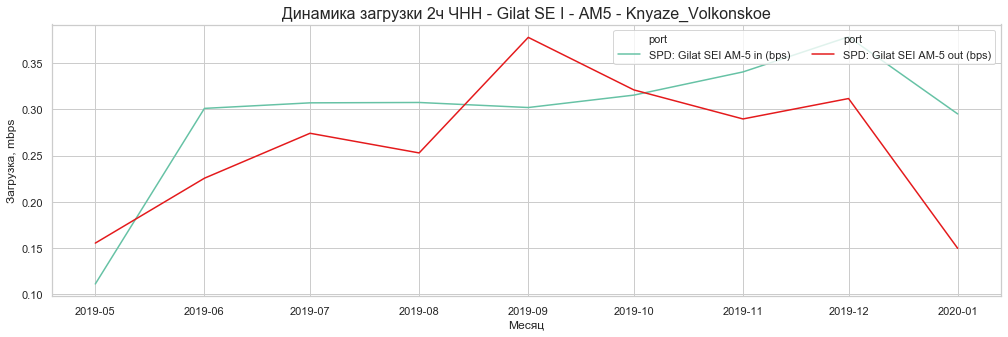

In [9]:
sns.set(style="whitegrid", color_codes=True, palette="Set1")
f, ax = plt.subplots(figsize = (17,5))
sns.lineplot(data=df.query('port == "SPD: Gilat SEI AM-5 in (bps)"'), x='date', y='avg_chnn', hue="port", palette="Set2")
sns.lineplot(data=df.query('port == "SPD: Gilat SEI AM-5 out (bps)"'), x='date', y='avg_chnn', hue="port")      
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="Загрузка, mbps",
       xlabel="Месяц")
#plt.xlim(2010, 2016)
plt.title('Динамика загрузки 2ч ЧНН - Gilat SE I - АМ5 - Knyaze_Volkonskoe', fontsize=16)
plt.show()

### Динамика средней загрузки в 2ч ЧНН - Gilat SE II Якутск - АМ5:

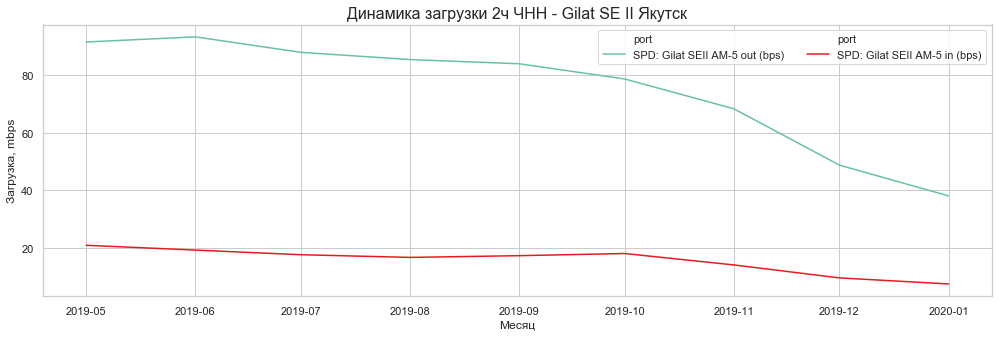

In [10]:
sns.set(style="whitegrid", color_codes=True, palette="Set1")
f, ax = plt.subplots(figsize = (17,5))
sns.lineplot(data=df.query('port == "SPD: Gilat SEII AM-5 out (bps)"'), x='date', y='avg_chnn', hue="port", palette="Set2")
sns.lineplot(data=df.query('port == "SPD: Gilat SEII AM-5 in (bps)"'), x='date', y='avg_chnn', hue="port")      
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="Загрузка, mbps",
       xlabel="Месяц")
#plt.xlim(2010, 2016)
plt.title('Динамика загрузки 2ч ЧНН - Gilat SE II Якутск', fontsize=16)
plt.show()

### Динамика средней загрузки в 2ч ЧНН - Gilat SE II АМ33 Иркутск:

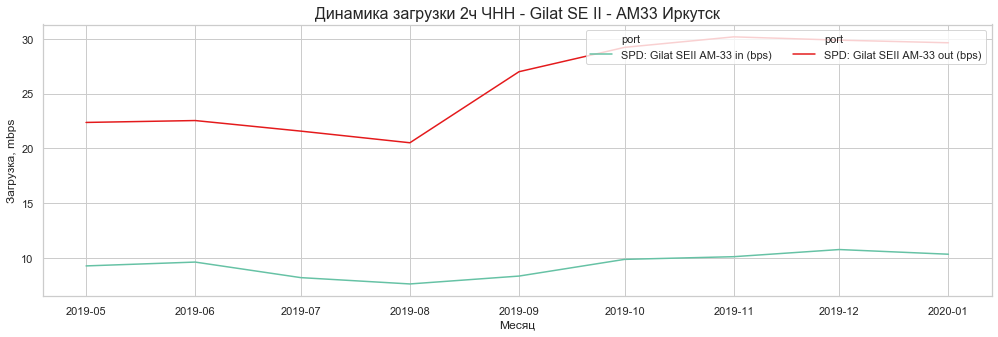

In [11]:
sns.set(style="whitegrid", color_codes=True, palette="Set1")
f, ax = plt.subplots(figsize = (17,5))
sns.lineplot(data=df.query('port == "SPD: Gilat SEII AM-33 in (bps)"'), x='date', y='avg_chnn', hue="port", palette="Set2")
sns.lineplot(data=df.query('port == "SPD: Gilat SEII AM-33 out (bps)"'), x='date', y='avg_chnn', hue="port")      
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="Загрузка, mbps",
       xlabel="Месяц")
#plt.ylim(0, 15)
plt.title('Динамика загрузки 2ч ЧНН - Gilat SE II - АМ33 Иркутск', fontsize=16)
plt.show()

### Динамика средней загрузки в 2ч ЧНН - Gilat SE I АМ33 Иркутск:

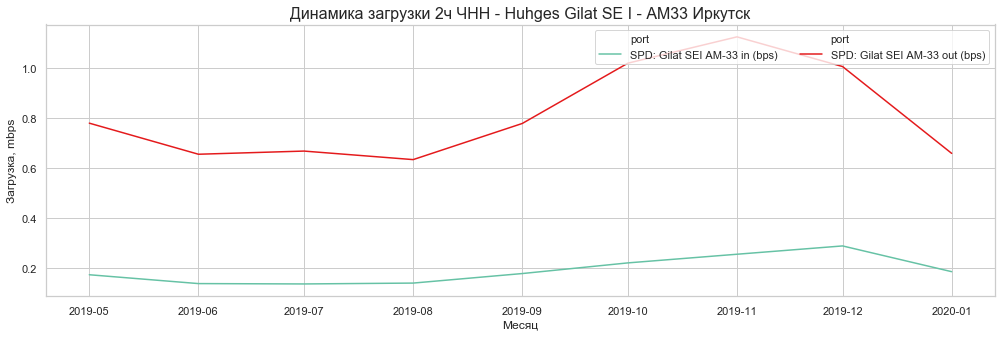

In [12]:
sns.set(style="whitegrid", color_codes=True, palette="Set1")
f, ax = plt.subplots(figsize = (17,5))
sns.lineplot(data=df.query('port == "SPD: Gilat SEI AM-33 in (bps)"'), x='date', y='avg_chnn', hue="port", palette="Set2")
sns.lineplot(data=df.query('port == "SPD: Gilat SEI AM-33 out (bps)"'), x='date', y='avg_chnn', hue="port")      
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="Загрузка, mbps",
       xlabel="Месяц")
#plt.ylim(0, 15)
plt.title('Динамика загрузки 2ч ЧНН - Huhges Gilat SE I - АМ33 Иркутск', fontsize=16)
plt.show()

### Динамика средней загрузки в 2ч ЧНН - Hughes HN АМ33:

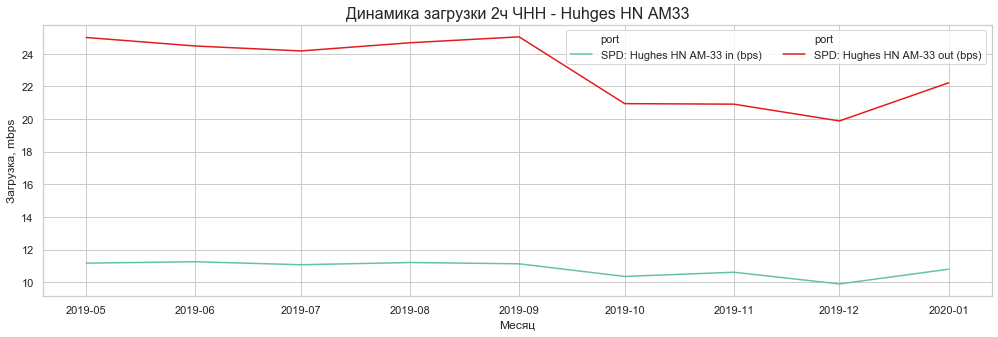

In [13]:
sns.set(style="whitegrid", color_codes=True, palette="Set1")
f, ax = plt.subplots(figsize = (17,5))
sns.lineplot(data=df.query('port == "SPD: Hughes HN AM-33 in (bps)"'), x='date', y='avg_chnn', hue="port", palette="Set2")
sns.lineplot(data=df.query('port == "SPD: Hughes HN AM-33 out (bps)"'), x='date', y='avg_chnn', hue="port")      
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="Загрузка, mbps",
       xlabel="Месяц")
#plt.ylim(0, 15)
plt.title('Динамика загрузки 2ч ЧНН - Huhges HN AM33', fontsize=16)
plt.show()

### Динамика средней загрузки в 2ч ЧНН - Hughes HX J4B + Я300К Владивосток:

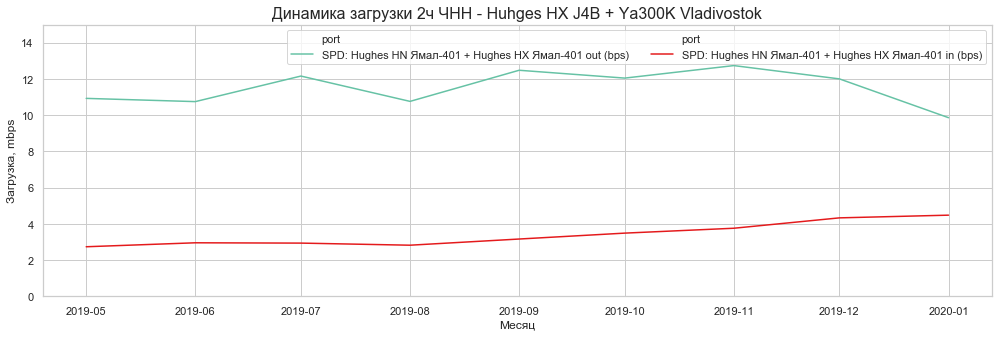

In [14]:
sns.set(style="whitegrid", color_codes=True, palette="Set1")
f, ax = plt.subplots(figsize = (17,5))
sns.lineplot(data=df.query('port == "SPD: Hughes HN Ямал-401 + Hughes HX Ямал-401 out (bps)"'), x='date', y='avg_chnn', hue="port", palette="Set2")
sns.lineplot(data=df.query('port == "SPD: Hughes HN Ямал-401 + Hughes HX Ямал-401 in (bps)"'), x='date', y='avg_chnn', hue="port")      
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="Загрузка, mbps",
       xlabel="Месяц")
plt.ylim(0, 15)
plt.title('Динамика загрузки 2ч ЧНН - Huhges HX J4B + Ya300K Vladivostok', fontsize=16)
plt.show()

### Динамика средней загрузки в  Hughes HN Ямал 402 М.Озера:

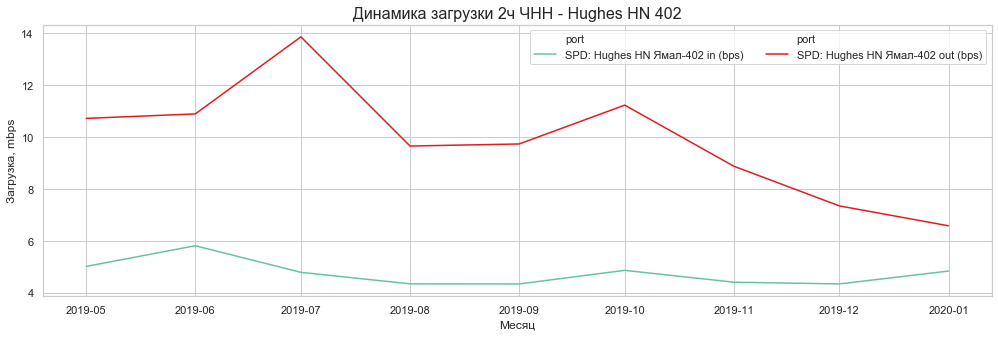

In [15]:
sns.set(style="whitegrid", color_codes=True, palette="Set1")
f, ax = plt.subplots(figsize = (17,5))
sns.lineplot(data=df.query('port == "SPD: Hughes HN Ямал-402 in (bps)"'), x='date', y='avg', hue="port", palette="Set2")
sns.lineplot(data=df.query('port == "SPD: Hughes HN Ямал-402 out (bps)"'), x='date', y='avg', hue="port")      
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="Загрузка, mbps",
       xlabel="Месяц")
#plt.xlim(2010, 2016)
plt.title('Динамика загрузки avg - Hughes HN 402', fontsize=16)
plt.show()

### Динамика максимальной загрузки в  Hughes HN Ямал 402 М.Озера:

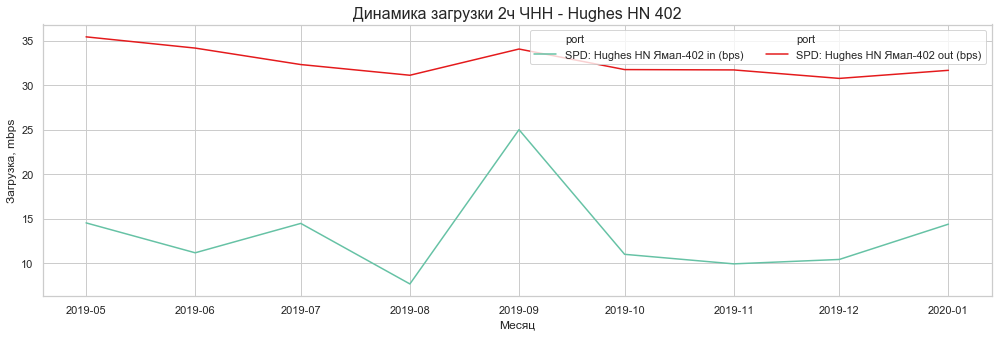

In [16]:
sns.set(style="whitegrid", color_codes=True, palette="Set1")
f, ax = plt.subplots(figsize = (17,5))
sns.lineplot(data=df.query('port == "SPD: Hughes HN Ямал-402 in (bps)"'), x='date', y='max', hue="port", palette="Set2")
sns.lineplot(data=df.query('port == "SPD: Hughes HN Ямал-402 out (bps)"'), x='date', y='max', hue="port")      
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="Загрузка, mbps",
       xlabel="Месяц")
#plt.xlim(2010, 2016)
plt.title('Динамика загрузки max - Hughes HN 402', fontsize=16)
plt.show()

### Динамика минимальной загрузки в  Hughes HN Ямал 402 М.Озера:

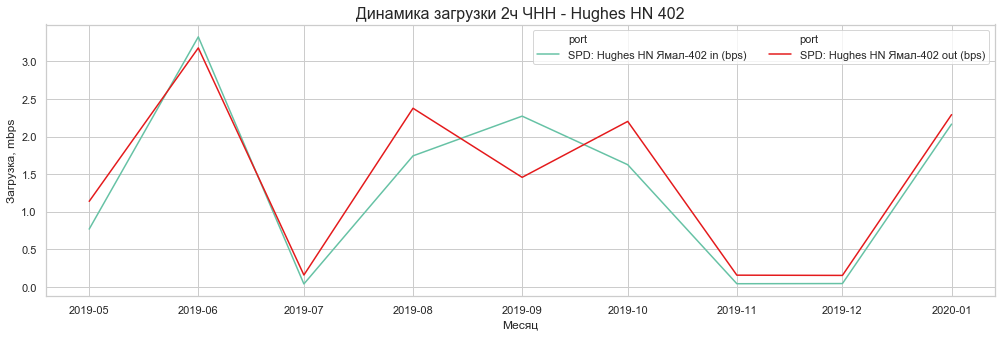

In [17]:
sns.set(style="whitegrid", color_codes=True, palette="Set1")
f, ax = plt.subplots(figsize = (17,5))
sns.lineplot(data=df.query('port == "SPD: Hughes HN Ямал-402 in (bps)"'), x='date', y='min', hue="port", palette="Set2")
sns.lineplot(data=df.query('port == "SPD: Hughes HN Ямал-402 out (bps)"'), x='date', y='min', hue="port")      
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="Загрузка, mbps",
       xlabel="Месяц")
#plt.xlim(2010, 2016)
plt.title('Динамика загрузки min - Hughes HN 402', fontsize=16)
plt.show()